### Energy Demand Prediction with Polynomial Regression
### Project Report 
Dany Maron - Model Engineering and Analysis (*danygontowmaron@my.unt.edu*) <br />
Jason Gillette - Data Engineering, Research, and Analysis (*jasongillette@my.unt.edu*) <br />
Kritagya Upadhyay - Data Analysis and Extension (*kritagyaupadhyay@my.unt.edu*) <br />

--- 

### Project Abstract
The weather events of February 2021 had a dramatic influence on how Texan's view energy reliability and the impacts of extreme shifts in weather. As a result of these events, this project aims to predict electric energy demand based off readily available weather forcasts. In order to achieve this objective, this project uses a polynomial regression model trained with open source weather data as the input and open source energy data as the ground truth. The project scope focuses on the Dallas Metropolitian Area with predictions tailored to Texas' north central region as defined by the Electric Reliability Council of Texas (ERCOT). <br />
After a detailed correlation analysis of weather effects and demand, a quadratic regression model effectively fit the data and successfully predicted demand with a root mean squared error of 2104 MwH relative to an average demand value of approximately 13,000 MwH. Model performance also resulted in a R^2 value of 0.6625 meaning the model accounts for 66.25% of variation in demand targets. <br />
The use of open source data and the performance of the regression model in meeting the prediction objectives has provided a foundation on which a more expansive prediction model can be built. Please review the "extensions" section of this report for suggestions, or any of the following sections for more information on this project in general. 


---



### Workflow
In order to meet the demands of this project within the relatively short period of time allotted, this project group was task organized, and group members independently achieve assigned milestones. Tasks were identified, accounted for, and synchronized during group meetings held every Saturday. Additional meetings were not required. Open communication was maintained via Discord server with email serving as a secondary means of communication. A shared Google Collab Notebook served as the development environment for the duration of the project with localized editing and testing as needed. The shared notebook and liberal use of commenting allowed for each group members to maintain up to date awareness on progress.  

---
### Project Milestones 


1.   Project Framing and Proposal 
2.   Research and Data Acquisition 
3.   Data Engineersing 
4.   Data Analysis 
5.   Model Development 
6.   Training and Testing
7.   Preformance Analysis

---






### Data Specifications

Energy Data Acqusition-<br />
The target variable for this model is the energy demand for the North Central region defined by ERCOT (see ERCOT Regions) in Megawatt per hour (MwH). The U.S. Energy Information Administration offers a free API which allows for the acqusition of this specific data. To access their API and browse catagories of data please visit the following link. 
*https://www.eia.gov/opendata/qb.php)* This API provided 16,008 data points detailing demand in MwH for every hour from May 27th, 2019 to March 24th, 2021.<br />
<br />
 Target Data Engineering-<br />
 In order to apply this data to our model Pandas was used to drop source labels, reset indexing, and change data types from string type to datetime and float accordingly. (See subject code cell below for more details) 





#### ERCOT Regions 
ERCOT consists of eight distinct weather zones (Figure 3). Weather zones1 represent a geographic region in which climatological characteristics are similar. Each weather zone has two or three weather stations that provide data for the assigned weather zone. In order to reflect the unique weather and load characteristics of each zone, separate load forecasting models were developed for each of the weather zones. See the following documentation for more details on ERCOT regions.<br />
http://www.ercot.com/content/wcm/lists/166967/2019_Long-Term_Hourly_Peak_Demand_and_Energy_Forecast_Report.pdf
#### North-Central Region contians the following counties / localities:
Bell, Coryell, Falls, McLennan, Limestone, Navarro, Hill, Bosque, Hamilton, Mills, Brown , Comanche, Erath, Somervell, Hood, Johnson, Ellis, Kaufman, Rockwall, Dallas, Tarrant, Parker, Palo Pinto, Eastland, Callahan, Stephens, Shackelford, Throckmorton, Young, Jack, Wise, Denton, Collin, Hunt

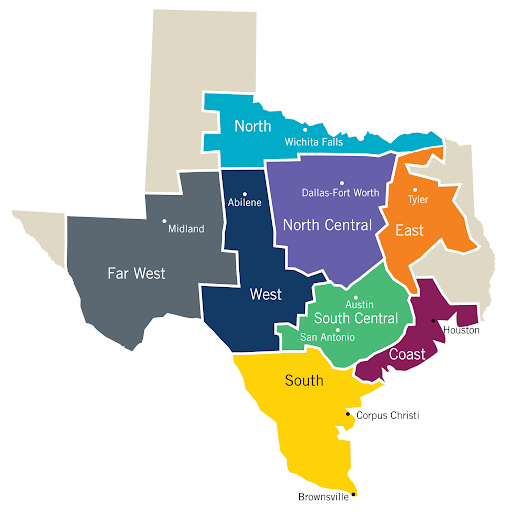

Weather Data Acquisition-<br />
The explanitory variable for this model is weather data provided by the National Oceanic and Atmospheric Administration (NOAA) via their data discovery porral found at the following link. *https://data.noaa.gov/datasetsearch/* This tool allowed for the acqusitiion of hourly weather measurements across multiple sensors and hundreds of locations across the United States. To remain within the scope of the project data was chosen for Dallas Love Field Airport given its abundence of data points and relative location within the region. In total NOAA provided approximately 407,038 datapoints for Dallas Love Field covering every hour from May 27th, 2019 to March 15th, 2021. Data was sourced from 3 sensors on location, and were organized into 89 categories of measurement. The method to recieve this data was email request vice an API.<br />
<br />
 Target Data Engineering-<br />
 In order to apply this data to our model Pandas and the Sklearn Imputer was used to complete the following list of tasks. Taking time to gain domain knowledge and researching each category proved critical in understanding how to organize the data in a manner that preserved its insights and facilitated training. 

*   Drop irrelevent categories of data 
*   Drop non-hourly sensors / reports 
*   Cull non-numeric characters and abbreviations from numeric data 
*   Convert data types specific to measurments 
*   Fill missing values with nearest neighbor or mean for each category 
*   Align and concatenate with energy data 

As a result of completing these tasks 221,320 data points were available for correlation analysis This dataset covers 15,814 hours and the following categories. Quantative variables were stored as float data types while the lone categorical variable was stored as a string. While not empolyed in this model, the categorical variable, Sky Conditions, was retained for future use with the application of natural language processing techniques.
- Date / Time (datetime)
- Hourly Dew Point Temperature (float)
- Hourly Dry Bulb Temperature (float)
- Hourly Precipitation (float)
- Hourly Relative Humidity (float)
- Hourly Sky Conditions (string) 
- Hourly Station Pressure (float)
- Hourly Wet Bulb Temperature (float)
- Hourly Wind Direction (float)
- Hourly Wind Speed (float)
- Demand MwH (float)

---



### Project Design 
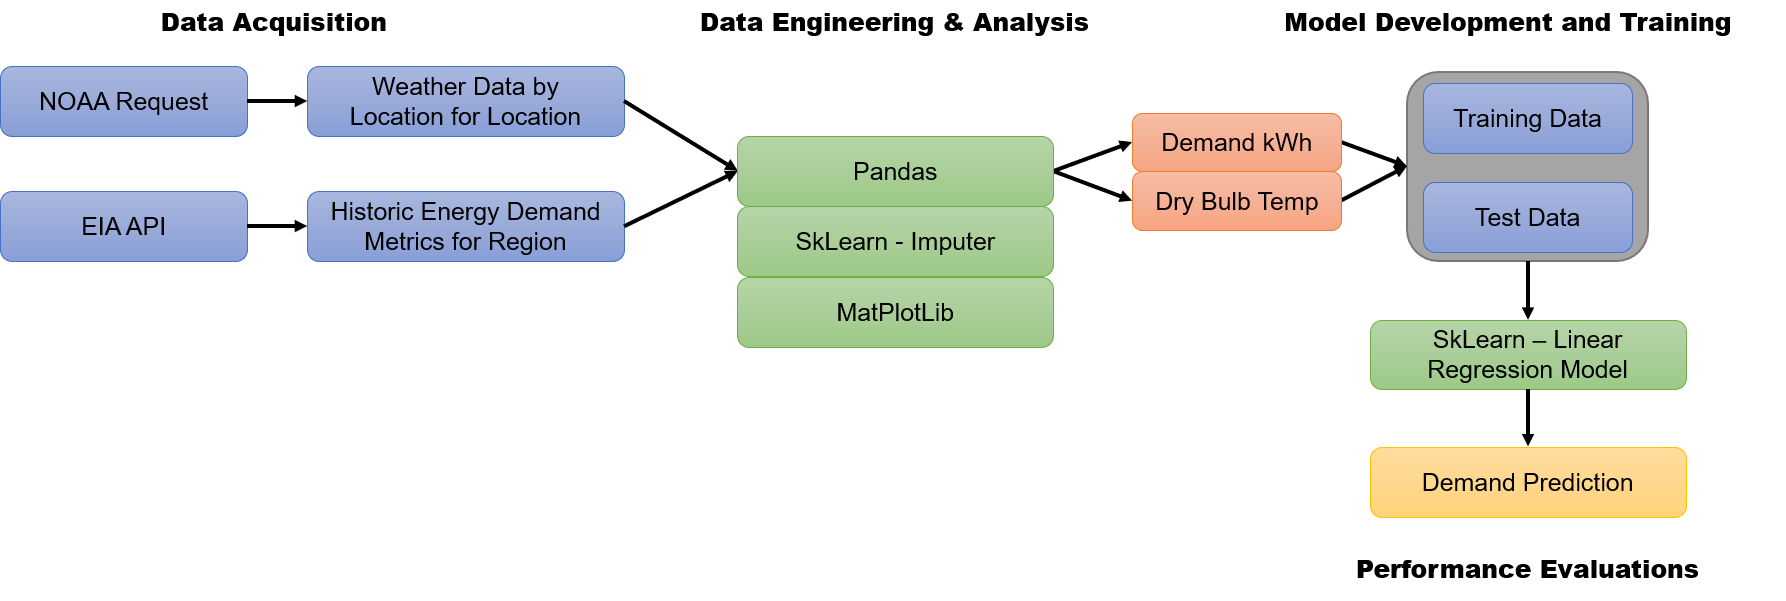


#### Data Acquisition and Engineering 
Phase one of this project invloved researching and acquiring open source solutions for both weather and energy data that was sufficient in volume and detail to successfully conduct training. As detailed in the *Data Specifications* portion of this report, use of the EIA API and the NOAA Data Discovery Portal proved adequate for the objective. Also detailed in the *Data Specifications* potion of this project is the steps required to effectively prepare the dataset for correlation analysis and training. <br />
Of note, *scikit learn imputer* was an instrumental tool in filling missing values in the NOAA data. *Simple Imputer* enables NaN values to be filled with a local mean within float data types in order to maintain the insightful patterns that allows a model to train. *KNN Imputer* was also utilized on the string data types of the categorical 'Sky Condition' variable. <br />
Extra characters, symbols, and abreviations also proved troublesome while ensuring proper data types class. Some examples include (70's) vice (70) in measures of temperature or the random presence of an extra digit. Pandas' *to_numeric* method with a *coerce* parameter assisted greatly in dropping error values. <br />
Pandas' merge on index method was the prefered method to combine the EIA sourced energy data and the newly cleaned weather data, however an unresolved format issue prevents the EIA data's datetime from being recognized by Pandas as anything other that a string. To work around this issue, a simple dataframe concatenation was used and the times from datasets were aligned by dropping extra rows. <br />



#### Data Analysis
To begin preliminary analysis of weather data in relation to demand, *MatPlotLib* and *Seaborn* were used to generate scatter plots for each data pair. Initial review revealed patterns between the three temperature related classes and demand. A confusion matrix was then used for a detailed correlation analysis. This revealed that of all classes of data, hourly dry bulb temperature showed the highest correlation with hourly demand at a measure of 0.42 (on a scale of -1 to 1, 1 being perfect positive correlation). Armed with these insights, it was decided to train the model using hourly dry bulb temperature against hourly demand targets. 


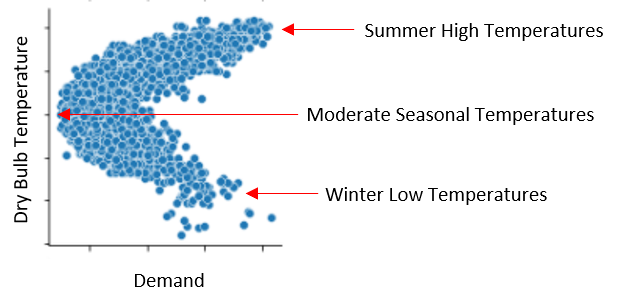

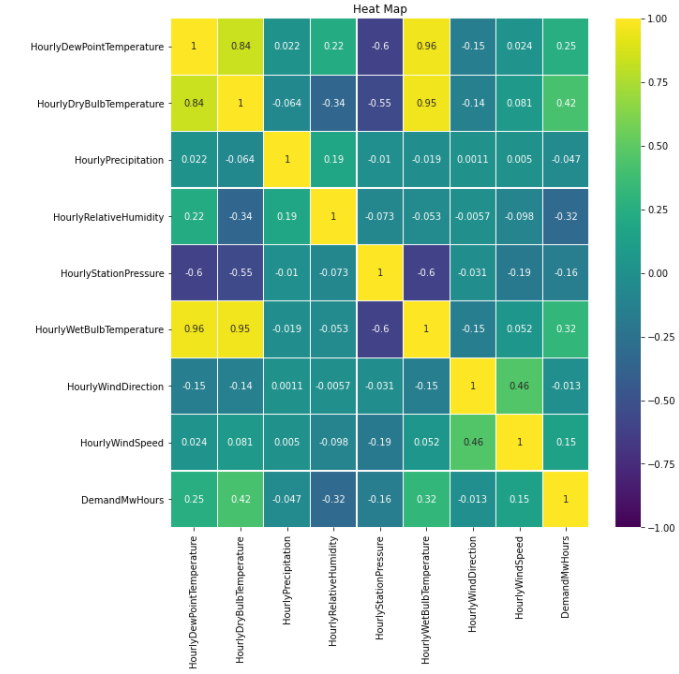

#### Model Development
<br />
The EDA results clearly pointed out to a non-linear relation between the energy demand and the temperature value. Moreover, the graphs indicated a potentially good fit for a quadratic equation, which lead us to proceed with a second-degree polynomial regression model.

We used Scikit Learn library to create a pipeline combining two steps: the polynomial features and the regression itself. 

As a first step, we have separated the predictor and the target variable in two dataframes named X and Y, respectively. These two dataframes were converted in Numpy arrays. The data was then split into training and test sets with a 80/20 ratio using Scikit Learn train_test_split function. The arrays were reshaped and the training data fit into the LinearRegression function.

Finally, we called the predict function using the test set and evaluated the model against the test labels.

#### Model Performance
Despite the relative simplicity of our quadratic model, predictions were able to achieve a root mean squared error of 2,104. This metric tells us that the model predicts with relative accuracy given an average demand of approximately 13,000. With a R^2 value of 0.6625, the model accounts for 66.25% of variation in demand targets. See the following table for 10 randomly selected predictions from the test data.
 <br />



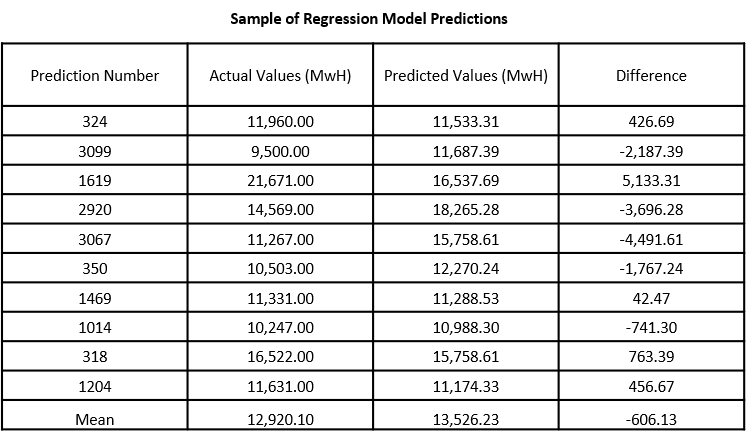


---



###Resources 
The following are free / open source resources that assisted or inspired the completion of this project. 

*   [Energy Information Administration’s public API](https://www.eia.gov/opendata/)
*   [Analyzing Electricity Price Time Series Data using Python](https://techrando.com/2019/07/19/analyzing-electricity-price-time-series-data-using-python-time-series-decomposition-and-price-forecasting-using-a-vector-autoregression-var-model/)
*   [Load Forecasting Tutorial - Energy Central](https://energycentral.com/c/em/load-forecasting-tutorial-part-1-data-preparation)
*   [Predicting Electricity Demand in LA](https://towardsdatascience.com/predicting-electricity-demand-in-la-outperforming-the-government-a0921463fde8)

This report and the corresponding code can be found in this repository.<br />
[Energy Demand Prediction with Polynomial Regression](https://github.com/JGillette71/Energy-Demand-Project)


---






### Project Extensions 
This project can be expanded in several different ways. 

*   Increase accuracy with normalization of data and factoring additional categories. 
*   Expand input data to multiple weather stations accross the region. 
*   Extend prediction to local energy prices for consumers 
*   Refine prediction through use of Sky Condition variable with natural language processing techniques. 


---




### Extension of our project
#### Time Series Analysis of Energy Sector using Auto Regressive Integrated Moving Average (ARIMA) model



We also have a separate extension of our project. We wanted to analyze if the problem can also be solved using ARIMA model with different datasets and features. 

**Note: As this is just an independent work and an extesnion of our project for CSCE 5300, it has a different dataset, feature engineering process, workflow, and different results from evalutaion of the performance of ARIMA model.**

**The reference to the extension of our project is provided in the following Github link.**


*   https://github.com/kritagya93/ARIMA_CSCE_5300_Spring_2021/blob/main/ARIMA.ipynb
*   https://github.com/kritagya93/ARIMA_CSCE_5300_Spring_2021/blob/main/ARIMA_pdf.pdf






ARIMA, also known as, Auto Regressive Integrated Moving Average is an approach to time series forecasting. ARIMA models aim to describe the auto-correlations in the data. Here, "**Auto Regression**" is a model that uses the dependent relationship between and observation and some number of lagged observations. "**Integrated**" is the use of differencing of raw observations in order to make the time series stationary. "**Moving Average**" is a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.




*   Regression: Model y ~ x
*   Model y based on the distribution of x



*   ARIMA: y ~ previous values of y
*   Model y based on previous values of y





ARIMA describes how each successive observation in a series is related to previous observations, which is quite different from regression, where we are relating a dependent variable to independent variables or factors.

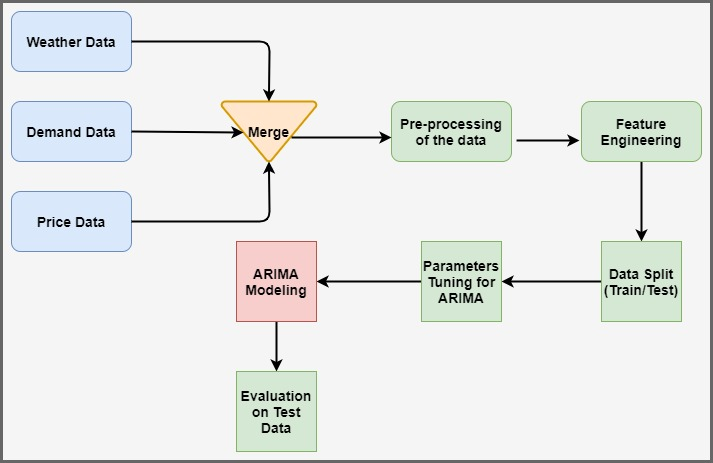

#### Usage of ARIMA model in Energy Sector for further research
Auto Correlation Function (ACF) is the correlation of a time series with its own past and future values. It is also known as lagged correlation or serial correlation, which is the correlation between members of a series of numbers arranged in time.
It describes how well the present value of the series is related with its past values.
A time series can have components like trend, seasonality, cyclic and residual.
ACF considers all these components while finding correlations hence it’s a ‘complete auto-correlation plot’.
For example, the likelihood of tomorrow being rainy is greater if today is rainy than if today is dry.

On the other hand, Partial Auto Correlation Function (PACF) is a partial auto-correlation function. It finds correlation of the residuals with the next lag value hence ‘partial’ and not ‘complete’ as we remove already found variations before we find the next correlation. If there is any hidden information in the residual which can be modeled by the next lag, we might get a good correlation and we will keep that next lag as a feature while modeling. In our extension part of project where we analyze the price and demand of electricity based on weather conditions from past, there are many instances where correlation is above upper confidence band as PACF calculates correlations of lags of time series with residuals and our series itself is linear combination of residual and its lagged values. Hence, we can get good correlation for near as well as past lags.


---




### Start of data acquisition code. 

In [ ]:
pip install EIA_python

In [ ]:
pip install noaa-sdk

     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.22.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: idna 2.10
    Uninstalling idna-2.10:
      Successfully uninstalled idna-2.10
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
# data management 
import pandas as pd
# mathematical operations on lists
import numpy as np
# energy info admin api
import eia
#parse the datetimes we get from NOAA
from datetime import datetime
# import the KNNimputer (replaces empty float values with nearest value)
from sklearn.impute import KNNImputer 
# Importing the SimpleImputer (replace empty str values w/ most freq for column)
from sklearn.impute import SimpleImputer 


# start of pulling eia demand data 
def retrieve_time_series(api, series_ID):
    """
    Return the time series dataframe, based on API and unique Series ID
    """
    #Retrieve Data By Series ID 
    series_search = api.data_by_series(series=series_ID)
    ##Create a pandas dataframe from the retrieved time series
    df = pd.DataFrame(series_search)
    return df


# Create EIA API using your specific API key
api_key = 'YOUR EIA API KEY HERE' # REMOVE BEFORE PUBLISH
api = eia.API(api_key)
# Declare desired series ID /  https://www.eia.gov/opendata/qb.php?category=371
series_ID='EBA.ERCO-NCEN.D.HL'


# pull of eia data 
demand_df = retrieve_time_series(api, series_ID)


# reanming the DataFrame columns
demand_df.reset_index(inplace=True)
demand_df = demand_df.rename(columns = {'index':'datetime'})
demand_df = demand_df.rename(columns = 
                             {'Demand for Electric Reliability Council of Texas, Inc. (ERCO), North Central, hourly - local time (megawatthours)':'DemandMwHours'})


# reconcile / organize data types for eia data
demand_dtype = {'datetime': str, 'DemandMwHours': float}
demand_df = demand_df.astype(demand_dtype)
# print(demand_df.dtypes)
demand_df.to_csv('demand_df.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Start of NOAA weather data cleaning for Dallas / Love Field 
# create list of useful columns from data
useful_columns = ['STATION', 
                   'DATE',
                   'REPORT_TYPE',
                   'HourlyDewPointTemperature', 
                   'HourlyDryBulbTemperature', 
                   'HourlyPrecipitation', 
                   'HourlyRelativeHumidity', 
                   'HourlySkyConditions', 
                   'HourlyStationPressure', 
                   'HourlyWetBulbTemperature', 
                   'HourlyWindDirection', 
                   'HourlyWindSpeed']


# import relevent columns from NOAA weather data csv
dallas_df = pd.read_csv('/content/drive/MyDrive/CSCE 5300 - Big Data/Project/2258013960 (Dallas FAA) Weather Data.csv', usecols = useful_columns) 


# drop all rows that are not REPORT_TYPE = 'FM-15' (FM-15 are hourly)
drops_index = dallas_df[ dallas_df['REPORT_TYPE'] != 'FM-15' ].index
dallas_df.drop(drops_index , inplace=True)


# turn mismatch non-numeric / non-floatable values into nan
numeric_cols = ['HourlyDewPointTemperature', 
                'HourlyDryBulbTemperature',
                'HourlyPrecipitation',
                'HourlyRelativeHumidity', 
                'HourlyStationPressure',
                'HourlyWetBulbTemperature', 
                'HourlyWindDirection', 
                'HourlyWindSpeed']
for i in numeric_cols:
  dallas_df[i] = dallas_df[i].apply(pd.to_numeric, errors='coerce')


# replace all the 'nan' strings w/ np.nan in SkyConditions column
dallas_df['HourlySkyConditions'] = dallas_df['HourlySkyConditions'].fillna('')


# reconcile / organize data types for dallas_df
dallas_dtype = {'STATION': int, 
                   'DATE': str,
                   'REPORT_TYPE': str, 
                   'HourlyDewPointTemperature': float, 
                   'HourlyDryBulbTemperature': float, 
                   'HourlyPrecipitation': float, 
                   'HourlyRelativeHumidity': float, 
                   'HourlySkyConditions': str, 
                   'HourlyStationPressure': float, 
                   'HourlyWetBulbTemperature': float, 
                   'HourlyWindDirection': float, 
                   'HourlyWindSpeed': float}
dallas_df = dallas_df.astype(dallas_dtype)
# print(dallas_df.dtypes)
# dallas_df.to_csv('dallas_df.csv')



# create df of non-float values to run simple imputer 
dallas_numeric = dallas_df[numeric_cols].copy()

# create an object for KNNImputer (replaces empty float values with nearest value)
imputer = KNNImputer(missing_values = np.nan, n_neighbors=2) 
dallas_imputation = imputer.fit_transform(dallas_numeric) 


# update to new df from array / float NaN replaed w/ nearest value
dallas_numeric = pd.DataFrame(dallas_imputation, columns = numeric_cols) 


# create list of non-float columns for simple imputer
other_columns = ['STATION', 
                   'DATE',
                   'REPORT_TYPE',
                   'HourlySkyConditions']


# create df of non-float values to run simple imputer 
dallas_other = dallas_df[other_columns].copy()
  

# create simple imputer to fill NaN in non-float cols w/ most frequent value
imputer = SimpleImputer(missing_values = np.nan, strategy ='most_frequent') 
imputer = imputer.fit(dallas_other)     
dallas_df_impute = imputer.transform(dallas_other) 


# update to new df that replaced all the non-float NaNs w/ most frequent value
dallas_other = pd.DataFrame(dallas_df_impute, columns = other_columns) 


# join imputed data into complete df 
dallas_df = dallas_other.join(dallas_numeric)
# dallas_df.to_csv('dallas_df')
# dallas_df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (48,51,53,56) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# reconcile datetime columns 
dallas_df['DATE'] = pd.to_datetime(dallas_df['DATE'], format='%Y-%m-%d %H:%M:%S')
# demand_df['datetime'] = pd.to_datetime(demand_df['datetime'], errors='coerce', format='%Y-%m-%d %H:%M:%S')


# reset index for dataframes for use when demand_df['datetime'] is fixed
#dallas_df.reset_index('DATE', inplace = True)
#demand_df.reset_index('DATE', inplace = True)


# removal of extra entry (11145) to align data (not long term solution for new df)
delete_row = dallas_df[dallas_df['DATE']=='9/2/2020  11:00:00 AM'].index
dallas_df = dallas_df.drop(delete_row)

# join dataframes
# dallas_df = pd.merge(dallas_df, demand_df, on='DATE', how='outer')
# dallas_df = dallas_df.join(demand_df)
final_df = pd.concat([dallas_df, demand_df], axis=1, join='inner')


final_df.to_csv('final_df.csv')
final_df

# Need to reconcile datetime format to concat on date columns
# currently manually aligned, not applicable to any new data sources

,STATION,DATE,REPORT_TYPE,HourlySkyConditions,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlyStationPressure,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,datetime,DemandMwHours
0,72258013960,2019-05-27 00:53:00,FM-15,FEW:02 250 OVC:08 300,67.0,79.0,0.0,67.0,29.36,71.0,160.0,17.0,2019 0527T01-05 27,12432.0
1,72258013960,2019-05-27 01:53:00,FM-15,FEW:02 250 BKN:07 300,67.0,78.0,0.0,69.0,29.38,71.0,180.0,11.0,2019 0527T02-05 27,11662.0
2,72258013960,2019-05-27 02:53:00,FM-15,FEW:02 20 SCT:04 220 BKN:07 300,67.0,77.0,0.0,71.0,29.39,70.0,170.0,13.0,2019 0527T03-05 27,11164.0
3,72258013960,2019-05-27 03:53:00,FM-15,SCT:04 21 BKN:07 190 BKN:07 300,67.0,76.0,0.0,74.0,29.39,70.0,180.0,14.0,2019 0527T04-05 27,10768.0
4,72258013960,2019-05-27 04:53:00,FM-15,FEW:02 17 BKN:07 190 BKN:07 300,67.0,75.0,0.0,76.0,29.39,70.0,170.0,11.0,2019 0527T05-05 27,10565.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15810,72258013960,2021-03-15 19:53:00,FM-15,FEW:02 250,33.0,71.0,0.0,25.0,29.31,52.0,60.0,3.0,2021 0315T19-05 15,11673.0
15811,72258013960,2021-03-15 20:53:00,FM-15,SCT:04 250,36.0,67.0,0.0,32.0,29.33,52.0,20.0,5.0,2021 0315T20-05 15,11658.0
15812,72258013960,2021-03-15 21:53:00,FM-15,SCT:04 250,35.0,66.0,0.0,32.0,29.34,51.0,80.0,5.0,2021 0315T21-05 15,11766.0
15813,72258013960,2021-03-15 22:53:00,FM-15,SCT:04 250,36.0,64.0,0.0,35.0,29.36,50.0,100.0,5.0,2021 0315T22-05 15,11316.0


# Exploratory Data Analysis
---



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Selecting variables and dataframes for EDA and regression
target_variable = 'DemandMwHours' #define target variable based on df column name

#create list of predictor variables
predictor_variables = [
                   'HourlyDewPointTemperature', 
                   'HourlyDryBulbTemperature', 
                   'HourlyPrecipitation', 
                   'HourlyRelativeHumidity', 
                   'HourlySkyConditions', 
                   'HourlyStationPressure', 
                   'HourlyWetBulbTemperature', 
                   'HourlyWindDirection', 
                   'HourlyWindSpeed']

drop_variables = ['STATION', 
                  'DATE',
                  'REPORT_TYPE']

X = final_df
X_sample = X.sample(frac=0.3) #select a random sample of the dataset for testing
X_sample = X_sample.drop(labels=drop_variables, axis=1)


##### We started our analysis by looking at all the weather related variables and they relationship with the energy demand.

The Pair Plots below indicate a strong correlation between temperature and energy demand, regardless of which temperature measurement we take (Dry Bulb, Wet Bulb or Dew Point).

<function matplotlib.pyplot.show>

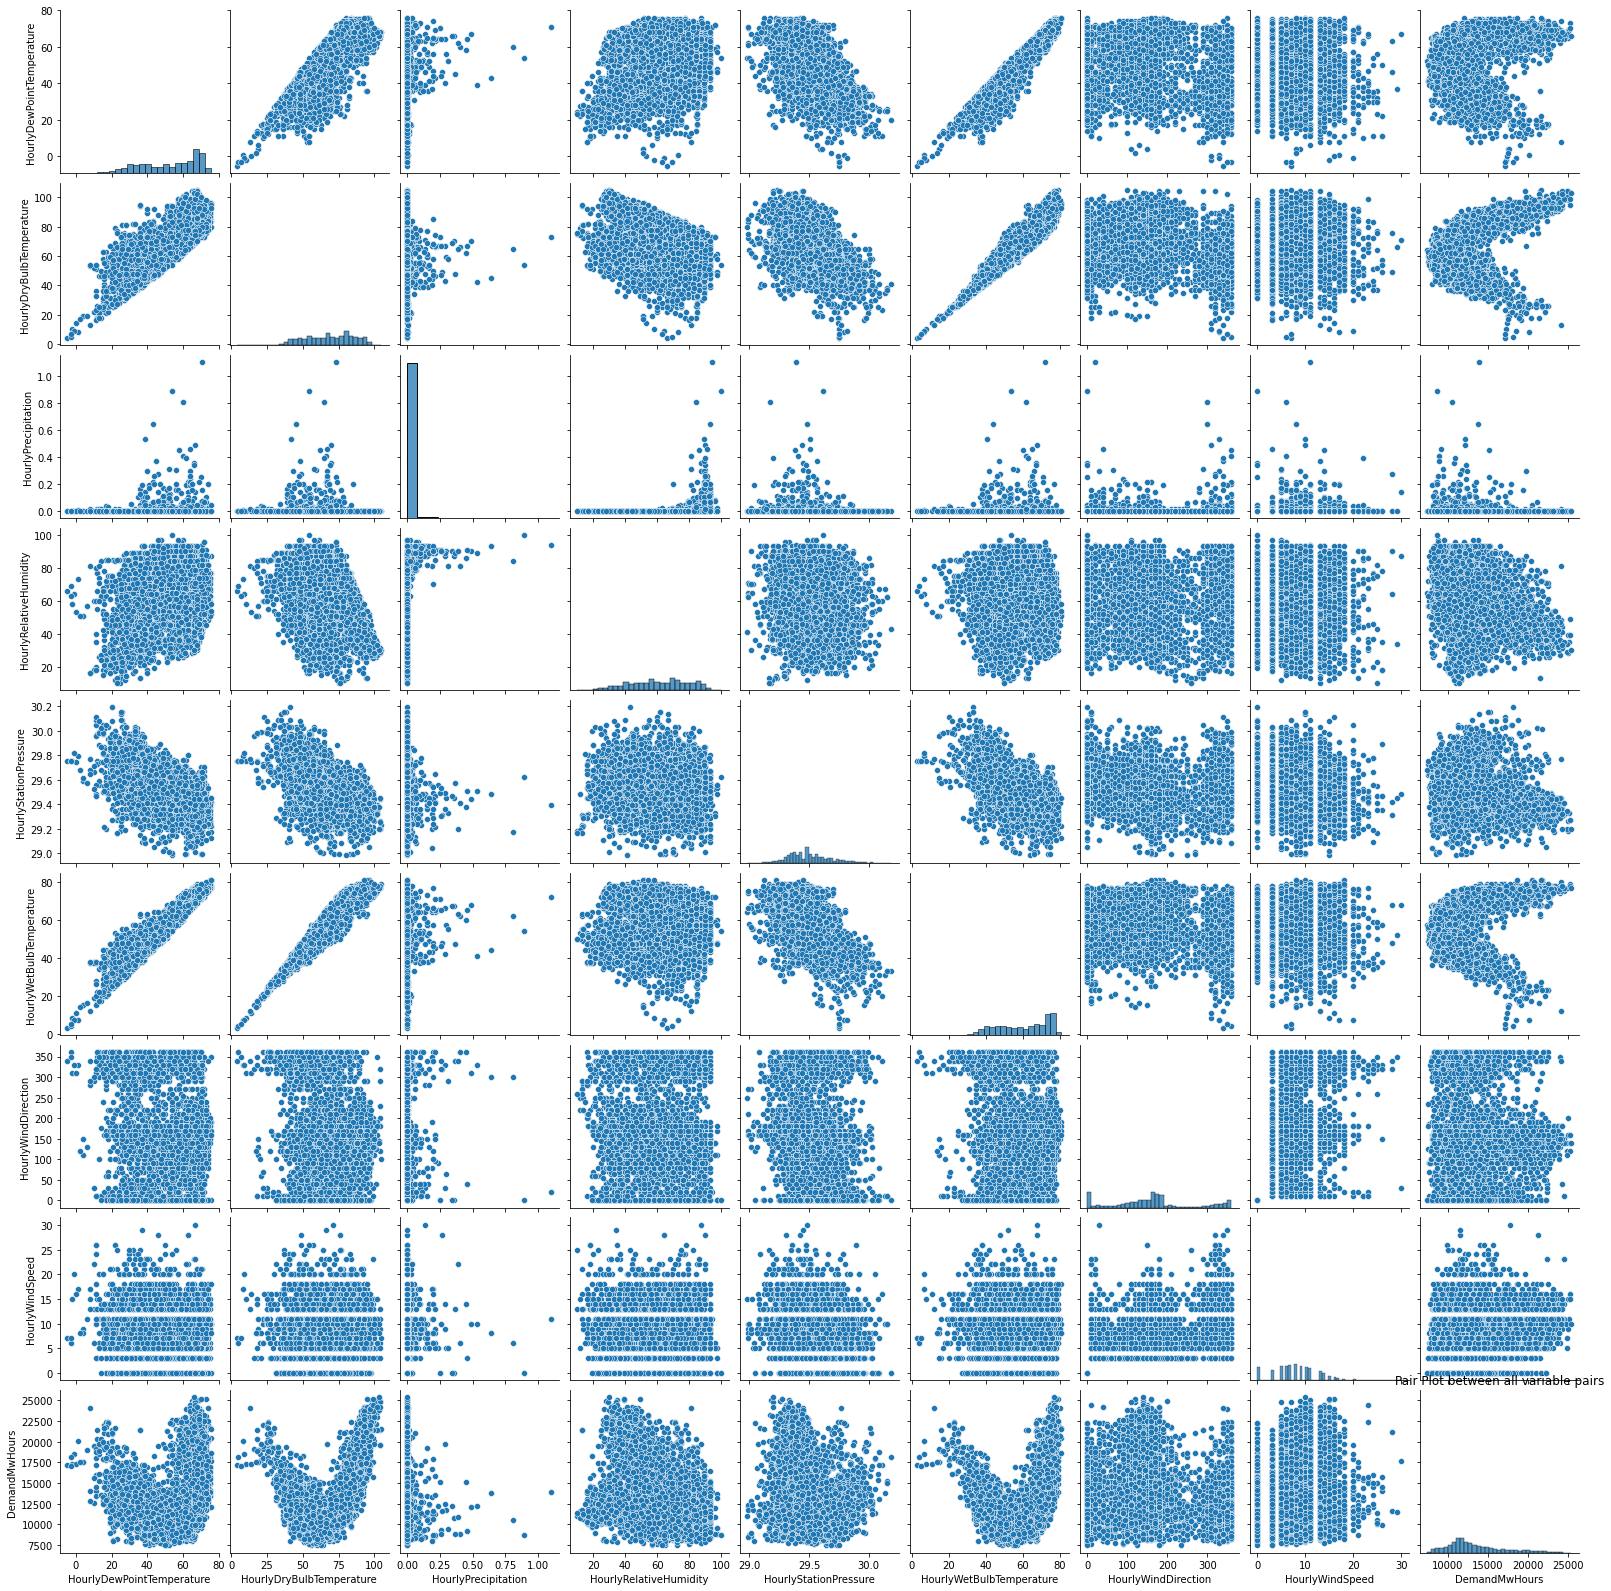

In [ ]:
#Pair plot - check correlations at a glance
sns.pairplot(X_sample)
plt.title('Pair Plot between all variable pairs')
plt.show

##### The Density Plot below shows the energy demand distribution, measured in MwHours, over a continuous period. This is a variation of a Histogram and the peaks of a Density Plot display where values are concentrated. 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


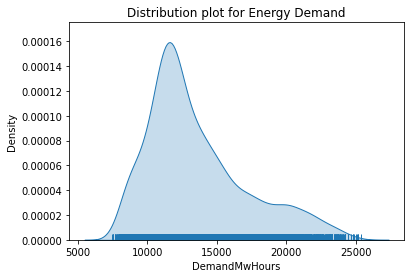

In [ ]:
#Distribution plot
sns.distplot(X_sample[target_variable],
             hist=False,
             rug=True,
             kde_kws={'shade':True})

plt.title('Distribution plot for Energy Demand')
plt.show()

##### Since the Pair Plots indicated the strong relationship between temperature and energy demand, we will proceed with our analysis looking at these two variables. We selected the Hourly Dry Bulb Temperature measurement to represent temperature.
Before proceeding with any further analysis, we looked at the Box Plots below to identify potential outliers in the predictor and target variables.

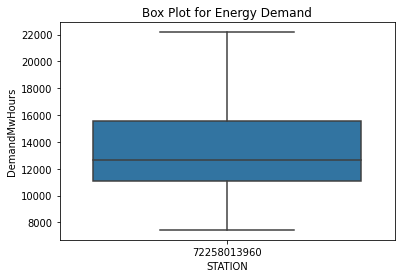

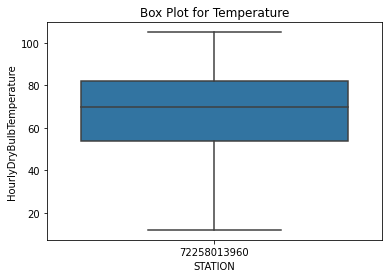

In [ ]:
#Boxplot to check for outliers
sns.boxplot(data=X, x='STATION', y=target_variable, showfliers=False)
plt.title('Box Plot for Energy Demand')
plt.show()

sns.boxplot(data=X, x='STATION', y='HourlyDryBulbTemperature', showfliers=False)
plt.title('Box Plot for Temperature')
plt.show()

##### Since they are no apparent outliers, we proceed with a correlation analysis to confirm that we could run a regression model. The Heat Map below shows the correlation between the variables in our dataset.
As expected, the strongest correlation is between the temperature and the energy demand, while the other variables do not seem to influence the output.

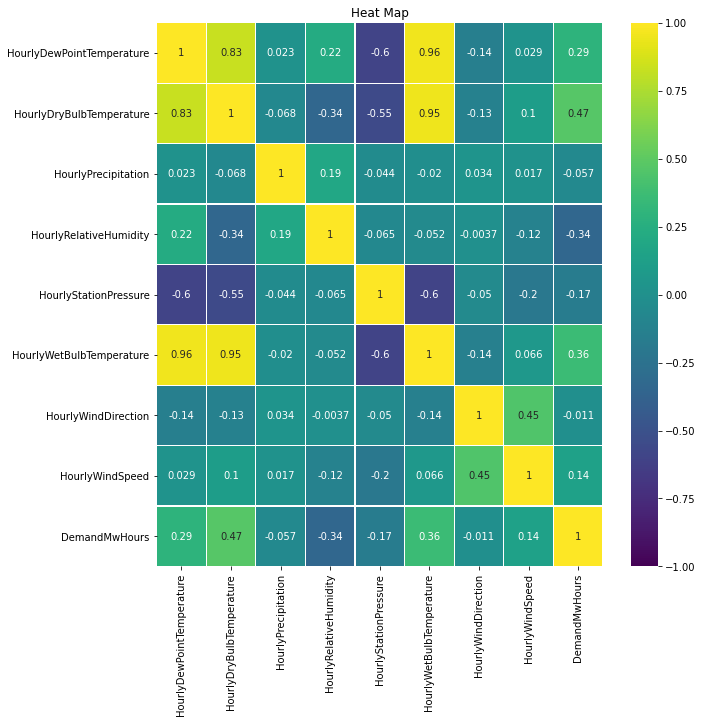

In [ ]:
#heatmap
df_correlation = X_sample.corr()
plt.figure(figsize=(10,10))
plt.title('Heat Map')
sns.heatmap(df_correlation, vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)
plt.show()

##### As a final step prior to the regression exercise itself, we took a closer look at the type of relationship between our selected variables in order to identify the correct regression to run. 
As the graph below indicates, a second degree polynomial seem to be fit well in the DemandMwHours curve. 

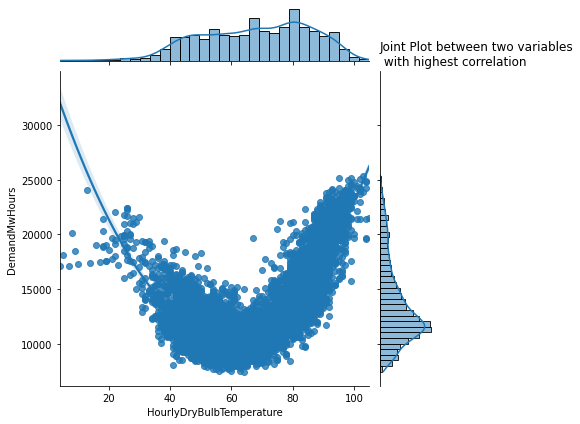

In [ ]:
sns.jointplot(x="HourlyDryBulbTemperature",
         y="DemandMwHours",
         kind='reg',
         data=X_sample,
         order=2,
         )
plt.title('Joint Plot between two variables\n with highest correlation', loc='left')
plt.show()

# Polynomial Regression


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import sklearn.metrics as metrics

from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
#OLS function - Not used for now
import statsmodels.api as sm

def OLS(X, Y):
       
    #Normalize variables in training set
    scaler = StandardScaler()
    # Fit on training set only.
    scaler.fit(X_train)
    # Apply transform to both the training set and the test set.
    train_set = scaler.transform(X_train)
    test_set = scaler.transform(X_test)
    
    X_train = sm.add_constant(X_train)
    results = sm.OLS(y_train, X_train, hasconst=True).fit()
    summary = results.summary().as_text()
    return summary

In [ ]:
# Polynomial Regression function

def Poly_regression(X, Y, degree=2):
  polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([("polynomial_features", polynomial_features),
                       ("linear_regression", linear_regression)])
  return pipeline.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))


##### We prepared the data to feed the polynomial regression model.

In [ ]:
#Select X = Temperature and Y = Energy Demand for regression
Y = X[target_variable]
X = X.drop(columns=[target_variable, 'STATION', 'DATE', 'REPORT_TYPE', 'HourlySkyConditions', 'datetime'], axis=1)
x = X['HourlyDryBulbTemperature']
x = np.array(x)
y = np.array(Y)


##### And then split the data between a train and a test set using a 80/20 ratio.

In [ ]:
 #Split Train and Test sets
 X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 465)

In [ ]:
#Run polynomial regression
pipeline = Poly_regression(X_train, y_train, 2)

##### After training the model, we used the test set to predict the output. The blue line in the graph shows a satisfactory adherence to the data, which is confirmed by the Root Mean Squared Error (2104 MwH compared to a mean of approximatedely 13000 MwH is a relatively low variance), and by the R2 of 0.66.

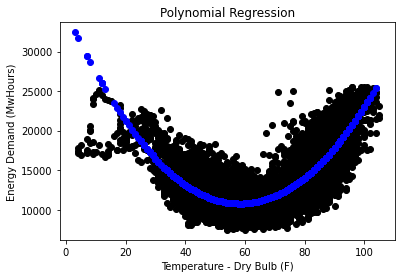


Root Mean Squared Error = 2104.893811905342

R2 = 0.6624881764104138


In [ ]:
#Predict output
Y_hat = pipeline.predict(X_test.reshape(-1, 1))

rmse = np.sqrt(metrics.mean_squared_error(y_test,Y_hat))
r2 = metrics.r2_score(y_test,Y_hat)

plt.scatter(X_train, y_train, color='black')
plt.scatter(X_test, Y_hat, color='blue')
plt.ylabel('Energy Demand (MwHours)')
plt.xlabel('Temperature - Dry Bulb (F)')
plt.title('Polynomial Regression')
plt.show()

print("\nRoot Mean Squared Error = {}".format(rmse))
print("\nR2 = {}".format(r2))